<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting Land Prices in Colombo</h1>

Dataset is downloaded from here: https://www.kaggle.com/datasets/ruchiraayeshmantha/land-prices-of-colombo-district?resource=download

**Usages for data generations**

In [1]:
switch_dict = {
    'Agricultural': 1,
    'Commercial': 2,
    'Residential': 3,
    'Other': 4
}

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,10)
pd.reset_option('display.float_format')
import requests


<h2 style='color:blue'>Data Load: Load Colombo land prices into a dataframe</h2>

In [3]:
df1 = pd.read_csv("datasets/P4_Data.csv")
df1.head()

,longitude,latitude,Price per Perch,Agricultural,Commercial,Residential,Other,Address,Price_Scale,Mentioned Price(Rs),...,police_mdist,post_office_count,post_office_mdist,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air
0,79.980418,6.917638,2372737.53,0.0,0.0,0.0,1.0,malabe,per perch,"440,000.00",...,773.0,2.0,602.0,9.0,1059.0,0.0,583.0,1.0,567.0,127.0
1,80.022840,6.910340,514669.88,0.0,0.0,1.0,0.0,ranala,total price,"4,000,000.00",...,0.0,0.0,0.0,0.0,0.0,1.0,514.0,0.0,0.0,125.0
2,79.943102,6.882818,2562167.25,0.0,1.0,0.0,0.0,thalawathugoda,per perch,"2,100,000.00",...,0.0,2.0,1150.0,10.0,695.0,1.0,1076.0,0.0,0.0,123.0
3,79.962091,6.890742,2048051.51,0.0,0.0,0.0,1.0,malabe,per perch,"850,000.00",...,773.0,2.0,602.0,9.0,1059.0,0.0,583.0,1.0,567.0,127.0
4,79.913879,6.835342,2230222.57,0.0,0.0,1.0,0.0,maharagama,per perch,"1,550,000.00",...,0.0,2.0,1261.0,14.0,521.0,2.0,1165.0,0.0,0.0,121.0


In [4]:
df1.shape

(23124, 81)

In [5]:
df1.columns

Index(['longitude', 'latitude', 'Price per Perch', 'Agricultural',
       'Commercial', 'Residential', 'Other', 'Address', 'Price_Scale',
       'Mentioned Price(Rs)', 'Address_ID', 'Land_size(Perches)',
       'Posted_Date_new', 'Distance from fort', 'count_govtschools_A',
       'min_dist_govtschools_a', 'count_govtschools_B',
       'min_dist_govtschools_b', 'count_semigovtschools',
       'min_dist_semigovtschools', 'count_intlschools', 'min_dist_intlschools',
       'count_uni', 'min_dist_uni', 'min_dist_nearest_express',
       'min_dist_nearest_railway', 'min_dist_nearest_bank',
       'count_banks_within_2km', 'min_dist_nearest_FinanceCompany',
       'count_FinanceCompanies_within_2km', 'min_dist_nearest_Govt_Hospital',
       'count_Govt_Hospitals', 'min_dist_nearest_Pvt_Hospital',
       'count_Pvt_Hospital', 'min_dist_nearest_Pvt_Med_center',
       'count_Pvt_Med_Centers', 'min_dist_nearest_Supermarket',
       'count_Supermarkets_within2km', 'min_dist_nearest_Fuel_station

In [6]:
df1['Address'].unique()

array(['malabe', 'ranala', 'thalawathugoda', 'maharagama', 'madapatha',
       'mount lavinia', 'kirulapone', 'kesbewa', 'nugegoda', 'makandana',
       'bope', 'nawala', 'kaduwela', 'bomiriya', 'athurugiriya',
       'piliyandala', 'dehiwala', 'battaramulla', 'boralesgamuwa',
       'hokandara', 'homagama', 'kahathuduwa', 'pitakotte', 'diyagama'],
      dtype=object)

In [7]:
df1['Address'].value_counts()

Address
ranala            2596
makandana         1995
kaduwela          1835
kesbewa           1523
piliyandala       1476
battaramulla      1430
malabe            1178
nugegoda          1023
thalawathugoda     864
bomiriya           848
madapatha          844
bope               824
nawala             817
dehiwala           706
homagama           681
athurugiriya       675
kahathuduwa        654
mount lavinia      576
diyagama           450
pitakotte          450
hokandara          428
maharagama         425
boralesgamuwa      424
kirulapone         402
Name: count, dtype: int64

<h2 style='color:blue'>Data Filter: Filter based on data counts higher than 50 for each city name</h2>

In [8]:
# Assuming df1 is your DataFrame
address_counts = df1['Address'].value_counts()
filtered_addresses = address_counts[address_counts >= 50].index
filtered_df = df1[df1['Address'].isin(filtered_addresses)]
filtered_df['Address'].value_counts()
row_count = filtered_df.shape[0]
print("Number of rows:", row_count)
filtered_df['Address'].value_counts()



Number of rows: 23124


Address
ranala            2596
makandana         1995
kaduwela          1835
kesbewa           1523
piliyandala       1476
battaramulla      1430
malabe            1178
nugegoda          1023
thalawathugoda     864
bomiriya           848
madapatha          844
bope               824
nawala             817
dehiwala           706
homagama           681
athurugiriya       675
kahathuduwa        654
mount lavinia      576
diyagama           450
pitakotte          450
hokandara          428
maharagama         425
boralesgamuwa      424
kirulapone         402
Name: count, dtype: int64

**Drop features that are not required to build our model**

In [9]:
df2 = df1.drop(['Land_size(Perches)', 'Price_Scale', 'Distance from fort', 'Mentioned Price(Rs)'], axis='columns')
df2.shape

(23124, 77)

<h2 style='color:blue'>Data Cleaning</h2>

**Handle NA values**

In [10]:
df2.isnull().sum()

longitude              0
latitude               0
Price per Perch        0
Agricultural           0
Commercial             0
                      ..
movie_theater_count    0
movie_theater_mdist    0
library_count          0
library_mdist          0
Air                    0
Length: 77, dtype: int64

In [11]:
df2.shape

(23124, 77)

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

longitude              0
latitude               0
Price per Perch        0
Agricultural           0
Commercial             0
                      ..
movie_theater_count    0
movie_theater_mdist    0
library_count          0
library_mdist          0
Air                    0
Length: 77, dtype: int64

In [13]:
df3.shape

(23124, 77)

In [14]:
df3.head()

,longitude,latitude,Price per Perch,Agricultural,Commercial,Residential,Other,Address,Address_ID,Posted_Date_new,...,police_mdist,post_office_count,post_office_mdist,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air
0,79.980418,6.917638,2372737.53,0.0,0.0,0.0,1.0,malabe,12.0,07/15/2021,...,773.0,2.0,602.0,9.0,1059.0,0.0,583.0,1.0,567.0,127.0
1,80.022840,6.910340,514669.88,0.0,0.0,1.0,0.0,ranala,1.0,11/13/2021,...,0.0,0.0,0.0,0.0,0.0,1.0,514.0,0.0,0.0,125.0
2,79.943102,6.882818,2562167.25,0.0,1.0,0.0,0.0,thalawathugoda,10.0,10/01/2023,...,0.0,2.0,1150.0,10.0,695.0,1.0,1076.0,0.0,0.0,123.0
3,79.962091,6.890742,2048051.51,0.0,0.0,0.0,1.0,malabe,12.0,10/04/2021,...,773.0,2.0,602.0,9.0,1059.0,0.0,583.0,1.0,567.0,127.0
4,79.913879,6.835342,2230222.57,0.0,0.0,1.0,0.0,maharagama,21.0,06/19/2022,...,0.0,2.0,1261.0,14.0,521.0,2.0,1165.0,0.0,0.0,121.0


<h2 style='color:blue'>Feature Engineering</h2>

**Method to check date type is correct**

In [15]:
def checkTypeDate(df, column_name):
    try:
        # Assuming 'Posted_Date_new' has the format 'mm/dd/yyyy'
        pd.to_datetime(df[column_name], format='%m/%d/%Y', errors='raise')
        
        print(f"Success: {column_name}")
        return True
    except ValueError as ve:
        # Specific handling for the ValueError when conversion fails
        print(f"Error: {column_name}, Error: {ve}")
        return False
    except Exception as e:
        # General handling for other exceptions
        print(f"Error: {column_name}, Unexpected Error: {e}")
        return False


In [16]:
checkTypeDate(df3, 'Posted_Date_new')

Success: Posted_Date_new


True

**Create a current month column**

In [17]:
from datetime import datetime

def addDateCount(given_date, min_date):
    # Calculate the difference
    difference = given_date - min_date
        
    # Extract the number of days from the difference
    return difference.days

def convertToDate(date_string):
    return datetime.strptime(date_string, "%m/%d/%Y")


In [18]:
df3['Posted_Date_new'] = df3['Posted_Date_new'].apply(convertToDate)
min_date = df3['Posted_Date_new'].min()
print(min_date)

df3['date_from'] = df3['Posted_Date_new'].apply(lambda x: addDateCount(x, min_date))
df3.head()

2015-09-10 00:00:00


,longitude,latitude,Price per Perch,Agricultural,Commercial,Residential,Other,Address,Address_ID,Posted_Date_new,...,post_office_count,post_office_mdist,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,date_from
0,79.980418,6.917638,2372737.53,0.0,0.0,0.0,1.0,malabe,12.0,2021-07-15,...,2.0,602.0,9.0,1059.0,0.0,583.0,1.0,567.0,127.0,2135
1,80.022840,6.910340,514669.88,0.0,0.0,1.0,0.0,ranala,1.0,2021-11-13,...,0.0,0.0,0.0,0.0,1.0,514.0,0.0,0.0,125.0,2256
2,79.943102,6.882818,2562167.25,0.0,1.0,0.0,0.0,thalawathugoda,10.0,2023-10-01,...,2.0,1150.0,10.0,695.0,1.0,1076.0,0.0,0.0,123.0,2943
3,79.962091,6.890742,2048051.51,0.0,0.0,0.0,1.0,malabe,12.0,2021-10-04,...,2.0,602.0,9.0,1059.0,0.0,583.0,1.0,567.0,127.0,2216
4,79.913879,6.835342,2230222.57,0.0,0.0,1.0,0.0,maharagama,21.0,2022-06-19,...,2.0,1261.0,14.0,521.0,2.0,1165.0,0.0,0.0,121.0,2474


**Add Columns which help to predict the price range for next months**

**Below add_month_lowest_highest_columns method adding columns 'X_lowest', 'X_highest' for dataframe. it contains min max values for the month of that Address_ID**

In [20]:
import pandas as pd

def add_month_lowest_highest_columns(df):
    # Convert Posted_Date_new to datetime with dayfirst=True
    df['Date_new'] = pd.to_datetime(df['Posted_Date_new'], format='%m/%d/%Y', dayfirst=True)

    # Extract month from Posted_Date_new
    df['Month'] = df['Date_new'].dt.to_period('M')

    # Step 1: Group by Address_ID and Month
    grouped_address = df.groupby(['Address_ID', 'Month'])

    # Step 2: For each group, find the min and max values
    result = grouped_address.agg({'Price per Perch': ['min', 'max']}).reset_index()

    # Rename the columns to month_lowest and month_highest
    result.columns = ['Address_ID', 'Month', 'min', 'max']

    # Step 3: Merge the result DataFrame back to the original DataFrame
    df = pd.merge(df, result, on=['Address_ID', 'Month'], how='left')

    # Create a new column for the next month
    df['Next_Month'] = df['Month'].apply(lambda x: x + 1)

    # Step 4: Merge the result DataFrame for the next month back to the original DataFrame
    df = pd.merge(df, result, left_on=['Address_ID', 'Next_Month'], right_on=['Address_ID', 'Month'],
                  suffixes=('_current', '_next'), how='left')

    # Drop the Next_Month column if not needed
    df.drop(['Next_Month'], axis=1, inplace=True)

    return df

In [21]:
df3 = add_month_lowest_highest_columns(df3)

In [22]:
df3.drop(['Month_next', 'Month_current', 'Date_new'], axis='columns', inplace=True)
df3

,longitude,latitude,Price per Perch,Agricultural,Commercial,Residential,Other,Address,Address_ID,Posted_Date_new,...,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,date_from,min_current,max_current,min_next,max_next
0,79.980418,6.917638,2372737.53,0.0,0.0,0.0,1.0,malabe,12.0,2021-07-15,...,0.0,583.0,1.0,567.0,127.0,2135,234247.74,5161169.37,193502.50,4921423.56
1,80.022840,6.910340,514669.88,0.0,0.0,1.0,0.0,ranala,1.0,2021-11-13,...,1.0,514.0,0.0,0.0,125.0,2256,475627.49,610000.00,443700.36,625000.00
2,79.943102,6.882818,2562167.25,0.0,1.0,0.0,0.0,thalawathugoda,10.0,2023-10-01,...,1.0,1076.0,0.0,0.0,123.0,2943,862793.15,3544916.65,915758.54,2603136.17
3,79.962091,6.890742,2048051.51,0.0,0.0,0.0,1.0,malabe,12.0,2021-10-04,...,0.0,583.0,1.0,567.0,127.0,2216,229366.26,4800000.00,245207.15,4993680.32
4,79.913879,6.835342,2230222.57,0.0,0.0,1.0,0.0,maharagama,21.0,2022-06-19,...,2.0,1165.0,0.0,0.0,121.0,2474,1750000.00,2230222.57,1982756.29,1982756.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23119,79.935589,6.878750,1350000.00,0.0,0.0,1.0,0.0,thalawathugoda,10.0,2015-10-28,...,1.0,484.0,0.0,0.0,127.0,48,1350000.00,1350000.00,850000.00,850000.00
23120,79.973969,6.916685,1500000.00,0.0,0.0,1.0,0.0,malabe,7.0,2016-02-14,...,0.0,0.0,1.0,712.0,129.0,157,440000.00,1500000.00,1500000.00,1500000.00
23121,79.926329,6.850203,1550000.00,0.0,0.0,1.0,0.0,maharagama,21.0,2015-09-10,...,5.0,1648.0,3.0,1236.0,126.0,0,1550000.00,1550000.00,NaN,NaN
23122,79.874762,6.825001,3000000.00,0.0,0.0,1.0,0.0,mount lavinia,16.0,2017-01-24,...,1.0,1081.0,0.0,0.0,126.0,502,2000000.00,3000000.00,NaN,NaN


**Explore all features is floats**

In [23]:
def print_non_float_data(df, column_name):
    try:
        df[column_name].astype(float)
        print(f"Success: {column_name}")
        return True
    except ValueError as e:
        print(f"Error: {column_name}, Error: {e}")
        return False


In [24]:
excluded_columns = ['Address', 'Land_type', 'Posted_Date_new', 'latitude', 'longitude']

for col in df3.columns:
    if col not in excluded_columns:
        print_non_float_data(df3, col)

Success: Price per Perch
Success: Agricultural
Success: Commercial
Success: Residential
Success: Other
Success: Address_ID
Success: count_govtschools_A
Success: min_dist_govtschools_a
Success: count_govtschools_B
Success: min_dist_govtschools_b
Success: count_semigovtschools
Success: min_dist_semigovtschools
Success: count_intlschools
Success: min_dist_intlschools
Success: count_uni
Success: min_dist_uni
Success: min_dist_nearest_express
Success: min_dist_nearest_railway
Success: min_dist_nearest_bank
Success: count_banks_within_2km
Success: min_dist_nearest_FinanceCompany
Success: count_FinanceCompanies_within_2km
Success: min_dist_nearest_Govt_Hospital
Success: count_Govt_Hospitals
Success: min_dist_nearest_Pvt_Hospital
Success: count_Pvt_Hospital
Success: min_dist_nearest_Pvt_Med_center
Success: count_Pvt_Med_Centers
Success: min_dist_nearest_Supermarket
Success: count_Supermarkets_within2km
Success: min_dist_nearest_Fuel_station
Success: count_Fuel_Stations_within2km
Success: baker

**Above shows that 'Price per Perch' can be '3,800,000.00'. For such case we can replace commace and spaces. Then can convert into float.**

**'Price per perch' feature transformation**

In [25]:
def transformtoPrices(value):
    try:
        return float(value.replace(' ', '').replace(',', ''))
    except:
        if pd.isna(value):
            return 0
        else: return value

In [26]:
df4 = df3.copy()
df4['Price per Perch'] = df3['Price per Perch'].apply(transformtoPrices)
print_non_float_data(df4, 'Price per Perch')

Success: Price per Perch


True

In [27]:
df4['min_current'] = df3['min_current'].apply(transformtoPrices)
print_non_float_data(df4, 'min_current')

Success: min_current


True

In [28]:
df4['max_current'] = df3['max_current'].apply(transformtoPrices)
print_non_float_data(df4, 'max_current')

Success: max_current


True

In [29]:
df4['min_next'] = df3['min_next'].apply(transformtoPrices)
print_non_float_data(df4, 'min_next')

Success: min_next


True

In [30]:
df4['max_next'] = df3['max_next'].apply(transformtoPrices)
print_non_float_data(df4, 'max_next')

Success: max_next


True

In [31]:
excluded_columns = ['Address', 'Land_type', 'Posted_Date_new', 'latitude', 'longitude']

for col in df4.columns:
    if col not in excluded_columns:
        print_non_float_data(df4, col)

Success: Price per Perch
Success: Agricultural
Success: Commercial
Success: Residential
Success: Other
Success: Address_ID
Success: count_govtschools_A
Success: min_dist_govtschools_a
Success: count_govtschools_B
Success: min_dist_govtschools_b
Success: count_semigovtschools
Success: min_dist_semigovtschools
Success: count_intlschools
Success: min_dist_intlschools
Success: count_uni
Success: min_dist_uni
Success: min_dist_nearest_express
Success: min_dist_nearest_railway
Success: min_dist_nearest_bank
Success: count_banks_within_2km
Success: min_dist_nearest_FinanceCompany
Success: count_FinanceCompanies_within_2km
Success: min_dist_nearest_Govt_Hospital
Success: count_Govt_Hospitals
Success: min_dist_nearest_Pvt_Hospital
Success: count_Pvt_Hospital
Success: min_dist_nearest_Pvt_Med_center
Success: count_Pvt_Med_Centers
Success: min_dist_nearest_Supermarket
Success: count_Supermarkets_within2km
Success: min_dist_nearest_Fuel_station
Success: count_Fuel_Stations_within2km
Success: baker

**For below row, it shows now data row how it is now**

In [32]:
df4.loc[30]

longitude           79.979759
latitude             6.902301
Price per Perch    1900158.58
Agricultural              0.0
Commercial                0.0
                      ...    
date_from                2271
min_current         245207.15
max_current        4993680.32
min_next             165000.0
max_next           5220135.83
Name: 30, Length: 82, dtype: object

In [33]:
df5 = df4.copy()
df5.shape

(23124, 82)

In [34]:
df5.head(10)

,longitude,latitude,Price per Perch,Agricultural,Commercial,Residential,Other,Address,Address_ID,Posted_Date_new,...,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,date_from,min_current,max_current,min_next,max_next
0,79.980418,6.917638,2372737.53,0.0,0.0,0.0,1.0,malabe,12.0,2021-07-15,...,0.0,583.0,1.0,567.0,127.0,2135,234247.74,5161169.37,193502.50,4921423.56
1,80.022840,6.910340,514669.88,0.0,0.0,1.0,0.0,ranala,1.0,2021-11-13,...,1.0,514.0,0.0,0.0,125.0,2256,475627.49,610000.00,443700.36,625000.00
2,79.943102,6.882818,2562167.25,0.0,1.0,0.0,0.0,thalawathugoda,10.0,2023-10-01,...,1.0,1076.0,0.0,0.0,123.0,2943,862793.15,3544916.65,915758.54,2603136.17
3,79.962091,6.890742,2048051.51,0.0,0.0,0.0,1.0,malabe,12.0,2021-10-04,...,0.0,583.0,1.0,567.0,127.0,2216,229366.26,4800000.00,245207.15,4993680.32
4,79.913879,6.835342,2230222.57,0.0,0.0,1.0,0.0,maharagama,21.0,2022-06-19,...,2.0,1165.0,0.0,0.0,121.0,2474,1750000.00,2230222.57,1982756.29,1982756.29
5,79.937244,6.759552,815588.11,0.0,1.0,0.0,0.0,madapatha,10.0,2023-12-21,...,0.0,0.0,0.0,0.0,117.0,3024,801442.05,2485989.47,943727.80,5882352.94
6,79.883083,6.857703,3435759.11,0.0,1.0,0.0,0.0,mount lavinia,11.0,2022-05-18,...,1.0,908.0,1.0,624.0,124.0,2442,725000.00,5184038.25,467852.90,8218371.66
7,79.874884,6.873284,7771699.70,0.0,0.0,1.0,0.0,kirulapone,17.0,2021-03-19,...,1.0,676.0,2.0,1446.0,127.0,2017,800000.00,7771699.70,504993.95,3419333.71
8,79.946734,6.794095,786372.77,1.0,0.0,0.0,0.0,kesbewa,4.0,2023-09-23,...,0.0,0.0,0.0,201.0,117.0,2935,780227.15,1197650.36,763500.38,1248260.69
9,79.898183,6.866984,3633182.15,1.0,0.0,0.0,0.0,nugegoda,15.0,2023-10-30,...,1.0,334.0,2.0,906.0,123.0,2972,2827490.51,5108215.45,600000.00,5491644.33


<h2 style='color:blue'>Outlier Removal Using Standard Deviation and Mean</h2>

In [35]:
pd.options.display.float_format = '{:,.2f}'.format
df5['Price per Perch'].describe()

count       23,124.00
mean     1,623,933.40
std      1,627,099.77
min         30,000.00
25%        524,695.70
50%        920,193.33
75%      2,333,371.87
max     40,000,000.00
Name: Price per Perch, dtype: float64

In [36]:
df5.shape

(23124, 82)

**Here we find that min price per perch is 30,000.00 rs/sqft whereas max is 40,000,000.00, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation. This will remove some of outliers**

In [37]:
def replace_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Address_ID'):
        m = np.mean(subdf['Price per Perch'])
        st = np.std(subdf['Price per Perch'])
        
        # Identify and replace outliers with the median value
        outliers = (subdf['Price per Perch'] < (m - st)) | (subdf['Price per Perch'] > (m + st))
        subdf.loc[outliers, 'Price per Perch'] = subdf['Price per Perch'].median()
        
        df_out = pd.concat([df_out, subdf], ignore_index=True)
    return df_out


pd.reset_option('display.float_format')
df6 = replace_pps_outliers(df5)
df6.head()

,longitude,latitude,Price per Perch,Agricultural,Commercial,Residential,Other,Address,Address_ID,Posted_Date_new,...,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,date_from,min_current,max_current,min_next,max_next
0,80.022840,6.910340,514669.88,0.0,0.0,1.0,0.0,ranala,1.0,2021-11-13,...,1.0,514.0,0.0,0.0,125.0,2256,475627.49,610000.00,443700.36,625000.00
1,80.037895,6.920356,516437.94,0.0,0.0,1.0,0.0,ranala,1.0,2019-10-28,...,0.0,0.0,0.0,0.0,129.0,1509,516437.94,560634.35,447916.67,550764.90
2,80.022384,6.910605,539023.44,0.0,0.0,1.0,0.0,ranala,1.0,2021-08-28,...,1.0,533.0,0.0,0.0,125.0,2179,522500.23,640625.00,430000.00,690000.00
3,80.034914,6.915302,538612.29,0.0,0.0,1.0,0.0,ranala,1.0,2020-08-08,...,0.0,0.0,0.0,0.0,127.0,1794,425000.00,562608.12,512594.84,565101.73
4,80.044320,6.924586,521393.09,0.0,0.0,1.0,0.0,ranala,1.0,2021-03-23,...,0.0,0.0,0.0,0.0,127.0,2021,510786.54,556755.12,519043.57,615000.00


In [38]:
# def remove_pps_outliers(df):
#     df_out = pd.DataFrame()
#     for key, subdf in df.groupby('Address_ID'):
#         m = np.mean(subdf['Price per Perch'])
#         st = np.std(subdf['Price per Perch'])
#         reduced_df = subdf[(subdf['Price per Perch']>(m-st)) & (subdf['Price per Perch']<=(m+st))]
#         df_out = pd.concat([df_out,reduced_df],ignore_index=True)
#     return df_out

# df7 = remove_pps_outliers(df5)
# df7.head()
df7 = df6.copy()

In [39]:
df7.shape

(23124, 82)

In [40]:
df6['Address'].value_counts()

Address
ranala            2596
makandana         1995
kaduwela          1835
kesbewa           1523
piliyandala       1476
battaramulla      1430
malabe            1178
nugegoda          1023
thalawathugoda     864
bomiriya           848
madapatha          844
bope               824
nawala             817
dehiwala           706
homagama           681
athurugiriya       675
kahathuduwa        654
mount lavinia      576
pitakotte          450
diyagama           450
hokandara          428
maharagama         425
boralesgamuwa      424
kirulapone         402
Name: count, dtype: int64

In [41]:
df6['date_from'].unique()

array([2256, 1509, 2179, ...,  405,  669,  491], dtype=int64)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

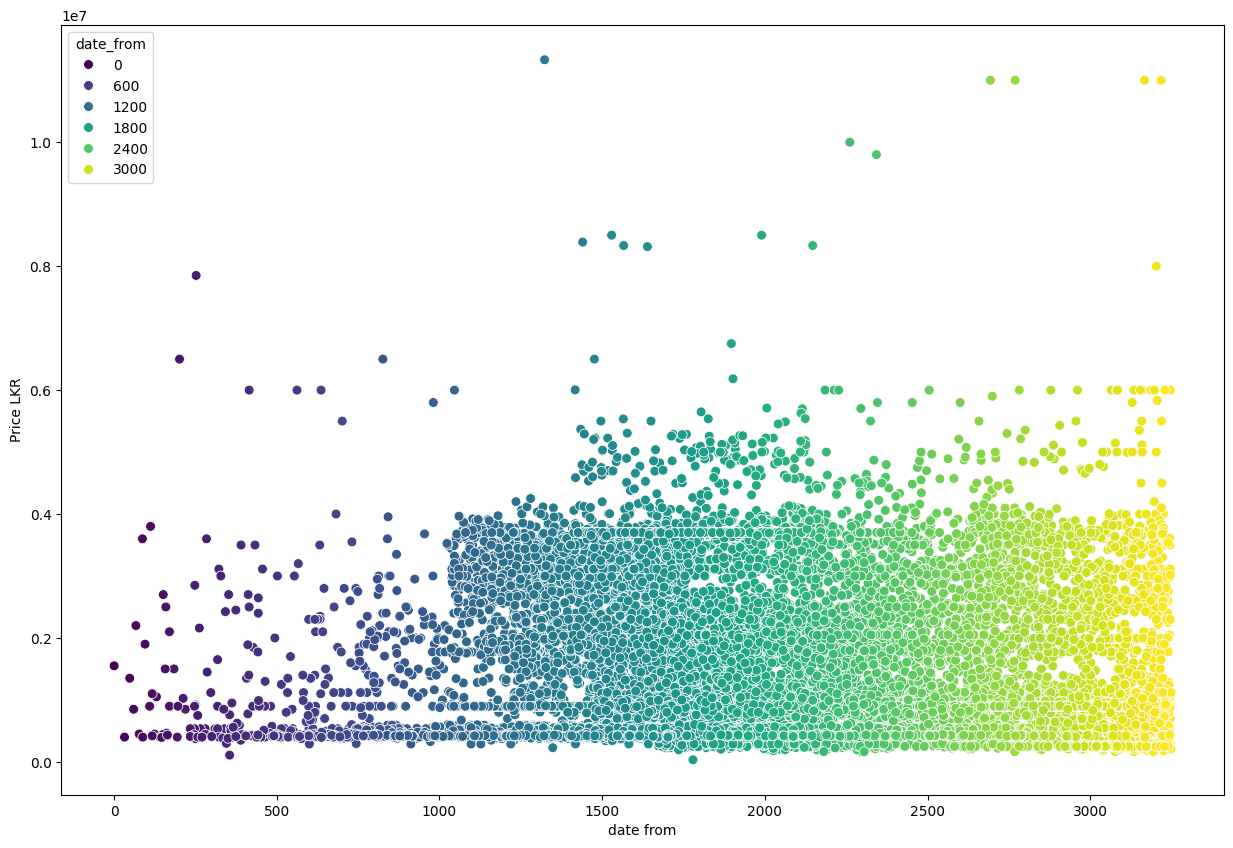

In [42]:
def plot_scatter_chart(location_data):
    plt.figure(figsize=(15, 10))

    # Use Seaborn's scatterplot to display all possible combinations
    sns.scatterplot(x='date_from', y='Price per Perch', hue='date_from', data=location_data, palette='viridis', s=50)

    plt.xlabel("date from")
    plt.ylabel("Price LKR")
    plt.legend(title='date_from')

    plt.show()
    
plot_scatter_chart(df6)

In [43]:
address_data = df6[['Address', 'Address_ID']].drop_duplicates()
city_dict = dict(zip(address_data['Address_ID'], address_data['Address']))

import json
columns = {
    'city_dict': city_dict
}

with open("datasets/city_dict.json", "w") as f:
    f.write(json.dumps(columns))

<h2 style='color:blue'>Droping Columns which cant generate using longitude and latitude</h2>

In [44]:
df6.head()

,longitude,latitude,Price per Perch,Agricultural,Commercial,Residential,Other,Address,Address_ID,Posted_Date_new,...,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,date_from,min_current,max_current,min_next,max_next
0,80.022840,6.910340,514669.88,0.0,0.0,1.0,0.0,ranala,1.0,2021-11-13,...,1.0,514.0,0.0,0.0,125.0,2256,475627.49,610000.00,443700.36,625000.00
1,80.037895,6.920356,516437.94,0.0,0.0,1.0,0.0,ranala,1.0,2019-10-28,...,0.0,0.0,0.0,0.0,129.0,1509,516437.94,560634.35,447916.67,550764.90
2,80.022384,6.910605,539023.44,0.0,0.0,1.0,0.0,ranala,1.0,2021-08-28,...,1.0,533.0,0.0,0.0,125.0,2179,522500.23,640625.00,430000.00,690000.00
3,80.034914,6.915302,538612.29,0.0,0.0,1.0,0.0,ranala,1.0,2020-08-08,...,0.0,0.0,0.0,0.0,127.0,1794,425000.00,562608.12,512594.84,565101.73
4,80.044320,6.924586,521393.09,0.0,0.0,1.0,0.0,ranala,1.0,2021-03-23,...,0.0,0.0,0.0,0.0,127.0,2021,510786.54,556755.12,519043.57,615000.00


In [45]:
df6.columns

Index(['longitude', 'latitude', 'Price per Perch', 'Agricultural',
       'Commercial', 'Residential', 'Other', 'Address', 'Address_ID',
       'Posted_Date_new', 'count_govtschools_A', 'min_dist_govtschools_a',
       'count_govtschools_B', 'min_dist_govtschools_b',
       'count_semigovtschools', 'min_dist_semigovtschools',
       'count_intlschools', 'min_dist_intlschools', 'count_uni',
       'min_dist_uni', 'min_dist_nearest_express', 'min_dist_nearest_railway',
       'min_dist_nearest_bank', 'count_banks_within_2km',
       'min_dist_nearest_FinanceCompany', 'count_FinanceCompanies_within_2km',
       'min_dist_nearest_Govt_Hospital', 'count_Govt_Hospitals',
       'min_dist_nearest_Pvt_Hospital', 'count_Pvt_Hospital',
       'min_dist_nearest_Pvt_Med_center', 'count_Pvt_Med_Centers',
       'min_dist_nearest_Supermarket', 'count_Supermarkets_within2km',
       'min_dist_nearest_Fuel_station', 'count_Fuel_Stations_within2km',
       'bakery_count', 'bakery_mdist', 'bank_count', 

In [46]:
pd.options.display.float_format = '{:.15f}'.format
df7 =df6.drop(['Address_ID', 'Address', 'count_govtschools_A', 'min_dist_govtschools_a', 'count_govtschools_B',
       'min_dist_govtschools_b', 'count_semigovtschools',
       'min_dist_semigovtschools', 'count_intlschools', 'min_dist_intlschools',
       'count_uni', 'min_dist_uni', 'min_dist_nearest_express',
       'min_dist_nearest_railway', 'min_dist_nearest_bank',
       'count_banks_within_2km', 'min_dist_nearest_FinanceCompany',
       'count_FinanceCompanies_within_2km', 'min_dist_nearest_Govt_Hospital',
       'count_Govt_Hospitals', 'min_dist_nearest_Pvt_Hospital',
       'count_Pvt_Hospital', 'min_dist_nearest_Pvt_Med_center',
       'count_Pvt_Med_Centers', 'min_dist_nearest_Supermarket',
       'count_Supermarkets_within2km', 'min_dist_nearest_Fuel_station',
       'count_Fuel_Stations_within2km', 'max_current', 'min_current'], axis='columns')

# Display the DataFrame
df7.head()

,longitude,latitude,Price per Perch,Agricultural,Commercial,Residential,Other,Posted_Date_new,bakery_count,bakery_mdist,...,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,date_from,min_next,max_next
0,80.022839923489556,6.910340134518209,514669.880000000004657,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,2021-11-13,2.000000000000000,1246.000000000000000,...,0.000000000000000,0.000000000000000,1.000000000000000,514.000000000000000,0.000000000000000,0.000000000000000,125.000000000000000,2256,443700.359999999986030,625000.000000000000000
1,80.037894966967528,6.920355721115214,516437.940000000002328,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,2019-10-28,5.000000000000000,5087.000000000000000,...,1.000000000000000,5260.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,129.000000000000000,1509,447916.669999999983702,550764.900000000023283
2,80.022384350962341,6.910604787034168,539023.439999999944121,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,2021-08-28,2.000000000000000,1277.000000000000000,...,0.000000000000000,0.000000000000000,1.000000000000000,533.000000000000000,0.000000000000000,0.000000000000000,125.000000000000000,2179,430000.000000000000000,690000.000000000000000
3,80.034913856537230,6.915301722254961,538612.290000000037253,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,2020-08-08,6.000000000000000,930.000000000000000,...,1.000000000000000,924.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,127.000000000000000,1794,512594.840000000025611,565101.729999999981374
4,80.044319620654448,6.924585656767241,521393.090000000025611,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,2021-03-23,3.000000000000000,7295.000000000000000,...,1.000000000000000,7385.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,127.000000000000000,2021,519043.570000000006985,615000.000000000000000


In [47]:
df7 = df7.drop(['Posted_Date_new'], axis='columns')
pd.reset_option('display.float_format')
df7.head()

,longitude,latitude,Price per Perch,Agricultural,Commercial,Residential,Other,bakery_count,bakery_mdist,bank_count,...,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,date_from,min_next,max_next
0,80.022840,6.910340,514669.88,0.0,0.0,1.0,0.0,2.0,1246.0,1.0,...,0.0,0.0,1.0,514.0,0.0,0.0,125.0,2256,443700.36,625000.00
1,80.037895,6.920356,516437.94,0.0,0.0,1.0,0.0,5.0,5087.0,2.0,...,1.0,5260.0,0.0,0.0,0.0,0.0,129.0,1509,447916.67,550764.90
2,80.022384,6.910605,539023.44,0.0,0.0,1.0,0.0,2.0,1277.0,1.0,...,0.0,0.0,1.0,533.0,0.0,0.0,125.0,2179,430000.00,690000.00
3,80.034914,6.915302,538612.29,0.0,0.0,1.0,0.0,6.0,930.0,2.0,...,1.0,924.0,0.0,0.0,0.0,0.0,127.0,1794,512594.84,565101.73
4,80.044320,6.924586,521393.09,0.0,0.0,1.0,0.0,3.0,7295.0,1.0,...,1.0,7385.0,0.0,0.0,0.0,0.0,127.0,2021,519043.57,615000.00


In [48]:
df7.shape

(23124, 51)

In [49]:
df7.isna().sum()
df7.head()

,longitude,latitude,Price per Perch,Agricultural,Commercial,Residential,Other,bakery_count,bakery_mdist,bank_count,...,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,date_from,min_next,max_next
0,80.022840,6.910340,514669.88,0.0,0.0,1.0,0.0,2.0,1246.0,1.0,...,0.0,0.0,1.0,514.0,0.0,0.0,125.0,2256,443700.36,625000.00
1,80.037895,6.920356,516437.94,0.0,0.0,1.0,0.0,5.0,5087.0,2.0,...,1.0,5260.0,0.0,0.0,0.0,0.0,129.0,1509,447916.67,550764.90
2,80.022384,6.910605,539023.44,0.0,0.0,1.0,0.0,2.0,1277.0,1.0,...,0.0,0.0,1.0,533.0,0.0,0.0,125.0,2179,430000.00,690000.00
3,80.034914,6.915302,538612.29,0.0,0.0,1.0,0.0,6.0,930.0,2.0,...,1.0,924.0,0.0,0.0,0.0,0.0,127.0,1794,512594.84,565101.73
4,80.044320,6.924586,521393.09,0.0,0.0,1.0,0.0,3.0,7295.0,1.0,...,1.0,7385.0,0.0,0.0,0.0,0.0,127.0,2021,519043.57,615000.00


In [50]:
import pandas as pd

# Assuming df is your DataFrame
column_mapping = {
    'Price per Perch': 'price',
    'latitude': 'lat',
    'longitude': 'long',
    'min_next': 'min_next',
    'max_next': 'max_next'
}

# Rename the columns using the mapping dictionary
df7.rename(columns=column_mapping, inplace=True)

df7.to_csv("datasets/training.csv", index=False)
df7.columns

Index(['long', 'lat', 'price', 'Agricultural', 'Commercial', 'Residential',
       'Other', 'bakery_count', 'bakery_mdist', 'bank_count', 'bank_mdist',
       'bar_count', 'bar_mdist', 'bus_station_count', 'bus_station_mdist',
       'clothing_store_count', 'clothing_store_mdist', 'doctor_count',
       'doctor_mdist', 'gas_station_count', 'gas_station_mdist', 'gym_count',
       'gym_mdist', 'hospital_count', 'hospital_mdist', 'university_count',
       'university_mdist', 'train_station_count', 'train_station_mdist',
       'supermarket_count', 'supermarket_mdist', 'store_count', 'store_mdist',
       'school_count', 'school_mdist', 'restaurant_count', 'restaurant_mdist',
       'police_count', 'police_mdist', 'post_office_count',
       'post_office_mdist', 'pharmacy_count', 'pharmacy_mdist',
       'movie_theater_count', 'movie_theater_mdist', 'library_count',
       'library_mdist', 'Air', 'date_from', 'min_next', 'max_next'],
      dtype='object')

<h2 style='color:blue'>Create training and testing datasets</h2>

In [51]:
x = df7.drop(['price', 'min_next', 'max_next'],axis='columns')
x.head(3)

,long,lat,Agricultural,Commercial,Residential,Other,bakery_count,bakery_mdist,bank_count,bank_mdist,...,post_office_count,post_office_mdist,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,date_from
0,80.022840,6.910340,0.0,0.0,1.0,0.0,2.0,1246.0,1.0,561.0,...,0.0,0.0,0.0,0.0,1.0,514.0,0.0,0.0,125.0,2256
1,80.037895,6.920356,0.0,0.0,1.0,0.0,5.0,5087.0,2.0,5065.0,...,1.0,5460.0,1.0,5260.0,0.0,0.0,0.0,0.0,129.0,1509
2,80.022384,6.910605,0.0,0.0,1.0,0.0,2.0,1277.0,1.0,542.0,...,0.0,0.0,0.0,0.0,1.0,533.0,0.0,0.0,125.0,2179


In [52]:
y = df7[['price', 'min_next', 'max_next']]
y.head(3)

,price,min_next,max_next
0,514669.88,443700.36,625000.0
1,516437.94,447916.67,550764.9
2,539023.44,430000.00,690000.0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=1000)

<h2 style='color:blue'>Build LinearRegression testing Model Now...</h2>

In [54]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.33700482236820567

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.35005561, 0.35135475, 0.35254161, 0.36252906, 0.37406811])

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeRegressor(), x, y, cv=cv)

array([0.46212646, 0.40641762, 0.37263901, 0.50581692, 0.46048725])

In [57]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the degree of polynomial features
degree = 2

# Creating polynomial features
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(x)

# Define cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Create a Polynomial regression model
poly_reg = LinearRegression()

# Perform cross-validation
scores = cross_val_score(poly_reg, x_poly, y, cv=cv)

# Convert scores to positive because cross_val_score returns negative MSE
mse_scores = -scores

# Print mean and standard deviation of MSE scores
print("Mean MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))
print(scores)


Mean MSE: -0.23525245841087453
Standard Deviation of MSE: 0.10820959486077496
[0.32046655 0.11302382 0.32105152 0.09297496 0.32874543]
